In [36]:
import numpy as np
from apprenticheshiplearning.utils.gridworld import plot_gridworld, plot_cost_function, plot_occupation
from apprenticheshiplearning.problems.gridworld import GridWorld
from apprenticheshiplearning.classes.solver import Solver

In [37]:
# Parameters
n = 10
wind_intensity = 0.3 # between 0 and 1
gamma = 0.9

In [38]:
grid = np.zeros((n, n))
goal = [                    
        [n-1, n-2], 
        [n-1]
        ]
obstacles = [
                [int(n/2)],
                [i for  i in range(0,int(n/1.2))]
            ]
actions = ["up", "down", "left", "right"]
init_dist = np.ones((n,n)) / n**2


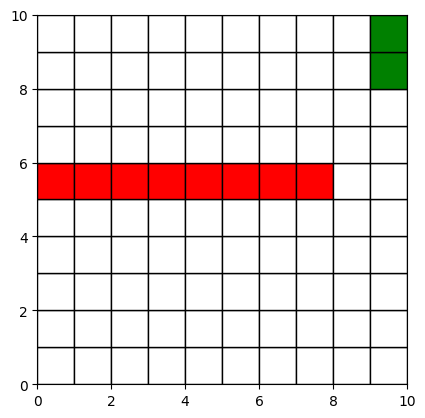

In [39]:
plot_gridworld(grid, obstacles, goal)

In [40]:
def transitions(s1, s , a, goal): #go from s to s1 with action a
    if a == "up":
        if s[0] in goal[0] and s[1] in goal[1]:
            if s1[0] == s[0] and s1[1] == s[0]:
                return 1
            else: 
                return 0
        elif s[0] != 0 and s[1] == n - 1:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1 - wind_intensity
            elif s1[0] == s[0] - 1 and s1[1] == s[1]:
                return wind_intensity
            else:
                return 0
        elif s[0] == 0 and s[1] == n - 1:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1
            else:
                return 0
        elif s[0] == 0 and s[1] < n - 1:
            if s1[0] == s[0] and s1[1] == s[1] + 1:
                return 1
            else:
                return 0
        else:
            if s1[0] == s[0] and s1[1] == s[1] + 1:
                return 1 - wind_intensity
            elif s1[0] == s[0] - 1 and s1[1] == s[1] + 1:
                return wind_intensity
            else:
                return 0
            
    if a == "down":
        if s[0] in goal[0] and s[1] in goal[1]:
            if s1[0] == s[0] and s1[1] == s[0]:
                return 1
            else: 
                return 0
        elif s[0] != 0 and s[1] == 0:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1 - wind_intensity
            elif s1[0] == s[0] - 1 and s1[1] == s[1]:
                return wind_intensity
            else:
                return 0
        elif s[0] == 0 and s[1] == 0:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1
            else:
                return 0
        elif s[0] == 0 and s[1] > 0:
            if s1[0] == s[0] and s1[1] == s[1] - 1:
                return 1
            else:
                return 0
        else:
            if s1[0] == s[0] and s1[1] == s[1] - 1:
                return 1 - wind_intensity
            elif s1[0] == s[0] - 1 and s1[1] == s[1] - 1:
                return wind_intensity
            else:
                return 0

    if a == "left":
        if s[0] in goal[0] and s[1] in goal[1]:
            if s1[0] == s[0] and s1[1] == s[0]:
                return 1
            else: 
                return 0
        elif s[0] == 0:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1
            else:
                return 0
        elif s[0] == 1:
            if s1[0] == s[0] - 1 and s1[1] == s[1]:
                return 1
            else:
                return 0
        else:
            if s1[0] == s[0] - 1 and s1[1] == s[1]:
                return 1 - wind_intensity
            elif s1[0] == s[0] - 2 and s1[1] == s[1]:
                return wind_intensity
            else:
                return 0

    if a == "right":
        if s[0] in goal[0] and s[1] in goal[1]:
            if s1[0] == s[0] and s1[1] == s[0]:
                return 1
            else: 
                return 0
        elif s[0] == n - 1:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1
            else:
                return 0
        else:
            if s1[0] == s[0] + 1 and s1[1] == s[1]:
                return 1 - wind_intensity
            elif s1[0] == s[0] and s1[1] == s[1]:
                return wind_intensity
            else:
                return 0

def cost(s, a, goal, obstacles):
    r = -1
    if s[0] in obstacles[0] and s[1] in obstacles[1]:
        r = -10
    elif s[0] in goal[0] and s[1] in goal[1]:
        r = 10
    if a == "right":
        r -= wind_intensity
    return r

In [41]:
# go to the right always unless you are in the last column
expert_occupancy_measure = np.zeros((n, n, len(actions)))
expert_occupancy_measure[0, :n-1, 3] = 20.0
#expert_occupancy_measure[1, :n-1, 3] = 5.0
expert_occupancy_measure[:, n-1, 0] = 20.0
expert_occupancy_measure[:n-1, n-2, 0] = 10.0

rows, cols, _ = expert_occupancy_measure.shape
for row in range(rows):
    for col in range(cols):
        if row in goal[0] and col in goal[1]:
            expert_occupancy_measure[row, col, :] = 50.0
        if row in obstacles[0] and col in obstacles[1]:
            expert_occupancy_measure[row, col, :] = 1
            expert_occupancy_measure[row, col, 3] = 0


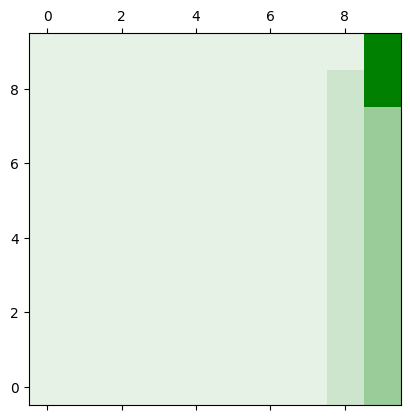

In [42]:
plot_occupation(expert_occupancy_measure[:,:,0])

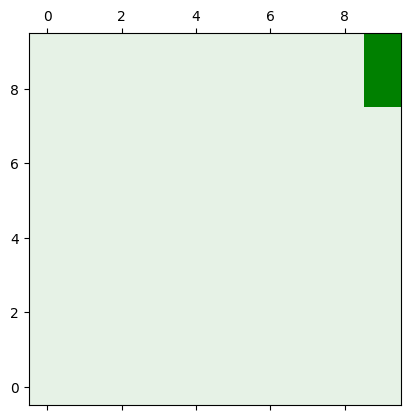

In [43]:
plot_occupation(expert_occupancy_measure[:,:,1])

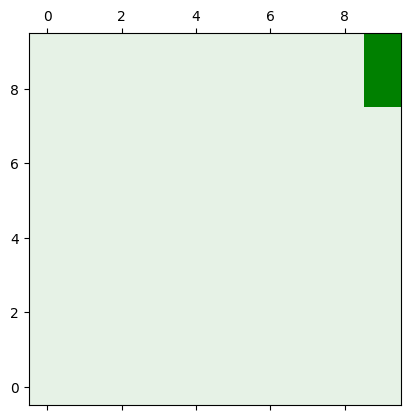

In [44]:
plot_occupation(expert_occupancy_measure[:,:,2])

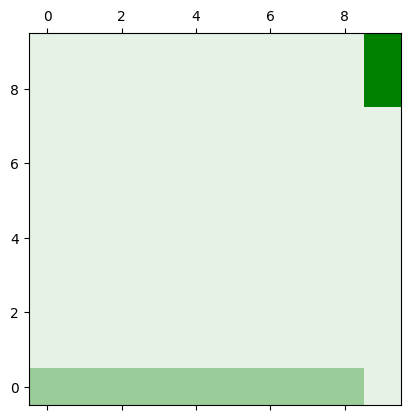

In [45]:
plot_occupation(expert_occupancy_measure[:,:,3])

In [46]:
gridworld = GridWorld(grid, obstacles, goal, actions, transitions, init_dist, cost, gamma, expert_occupancy_measure, cost)
gridworld.get_mdp()
gridworld.mdp.build_T()

In [47]:
solver = Solver(gridworld.mdp, gridworld.c_hat, gridworld.mdp.mu_e)
prob, c, u = solver.solve()

                                     CVXPY                                     
                                     v1.5.3                                    
(CVXPY) Aug 26 06:33:17 PM: Your problem has 500 variables, 400 constraints, and 0 parameters.
(CVXPY) Aug 26 06:33:17 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Aug 26 06:33:17 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Aug 26 06:33:17 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Aug 26 06:33:17 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Aug 26 06:33:17 PM: Compiling problem (target solver=CLARABEL

In [48]:
c_reconstructed = np.zeros((n, n, len(actions)))
for i in range(len(c.value)):    
    c_reconstructed[gridworld.S_to_grid[i % n**2][0], 
                    gridworld.S_to_grid[i % n**2][1], 
                    int(i / n**2)
                    ] = c.value[i]

UP


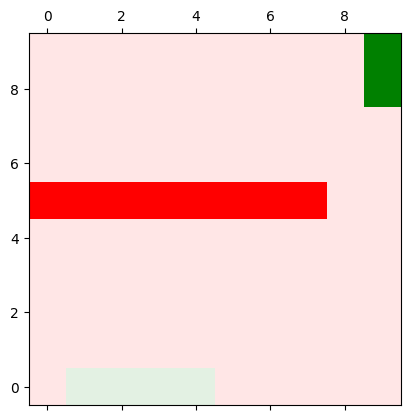

In [49]:
print("UP")
plot_cost_function(c_reconstructed[:, :, 0])

DOWN


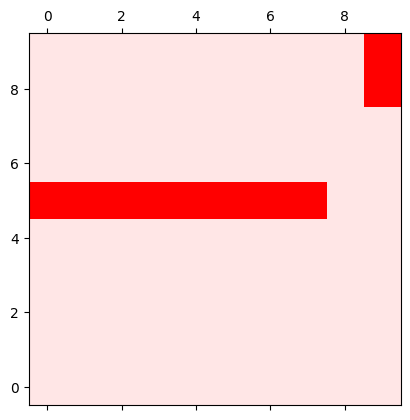

In [50]:
print("DOWN")
plot_cost_function(c_reconstructed[:, :, 1])

LEFT


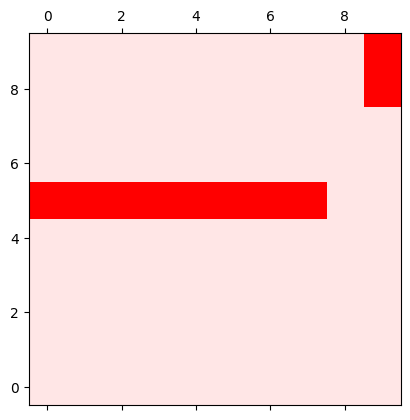

In [51]:
print("LEFT")
plot_cost_function(c_reconstructed[:, :, 2])

RIGHT


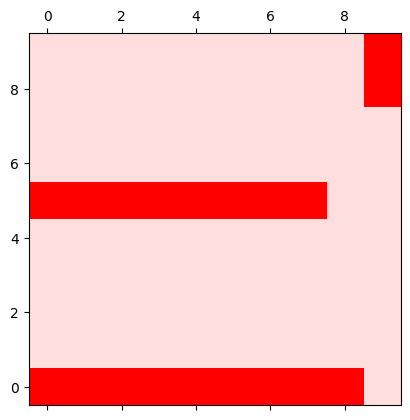

In [52]:
print("RIGHT")
plot_cost_function(c_reconstructed[:, :, 3])

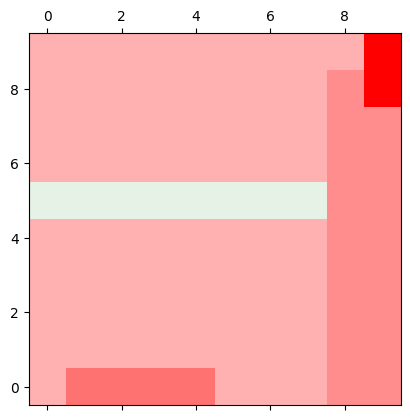

In [53]:
u_reconstructed = np.zeros((n, n))
for i in range(len(u.value)):
    u_reconstructed[gridworld.S_to_grid[i][0], gridworld.S_to_grid[i][1]] = u.value[i]
plot_cost_function(u_reconstructed)

### Inverse Optimization for Cost Function

In [54]:
prob, c, u = solver.solve_irl()

                                     CVXPY                                     
                                     v1.5.3                                    
(CVXPY) Aug 26 06:33:17 PM: Your problem has 500 variables, 401 constraints, and 0 parameters.
(CVXPY) Aug 26 06:33:17 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Aug 26 06:33:17 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Aug 26 06:33:17 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Aug 26 06:33:17 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Aug 26 06:33:17 PM: Compiling problem (target solver=CLARABEL

In [55]:
c_reconstructed = np.zeros((n, n, len(actions)))
for i in range(len(c.value)):    
    c_reconstructed[gridworld.S_to_grid[i % n**2][0], 
                    gridworld.S_to_grid[i % n**2][1], 
                    int(i / n**2)
                    ] = c.value[i]
u_reconstructed = np.zeros((n, n))
for i in range(len(u.value)):
    u_reconstructed[gridworld.S_to_grid[i][0], gridworld.S_to_grid[i][1]] = u.value[i]

UP


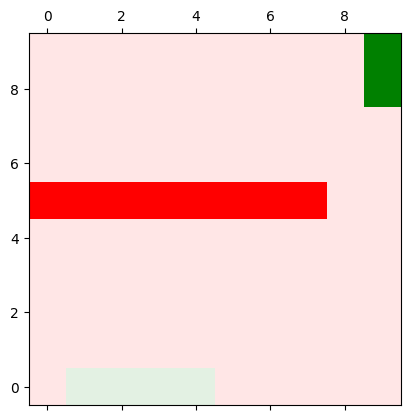

DOWN


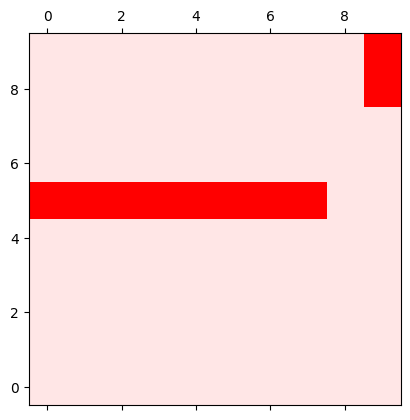

LEFT


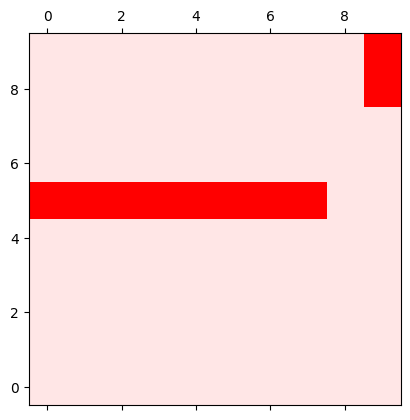

RIGHT


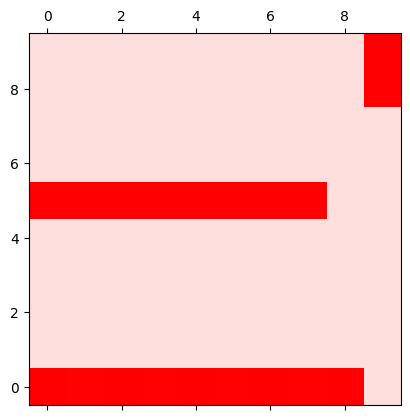

In [56]:
print("UP")
plot_cost_function(c_reconstructed[:, :, 0])
print("DOWN")
plot_cost_function(c_reconstructed[:, :, 1])
print("LEFT")
plot_cost_function(c_reconstructed[:, :, 2])
print("RIGHT")
plot_cost_function(c_reconstructed[:, :, 3])

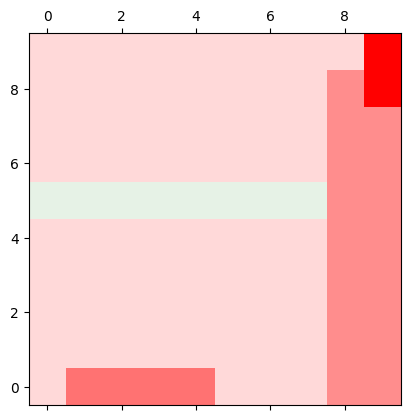

In [57]:
plot_cost_function(u_reconstructed)